# Assignment 1
Rishika Tibrewal \
MDS202135

### Question 1

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
img = cv2.imread('CinqueTerre.jpg')

(-0.5, 473.5, 314.5, -0.5)

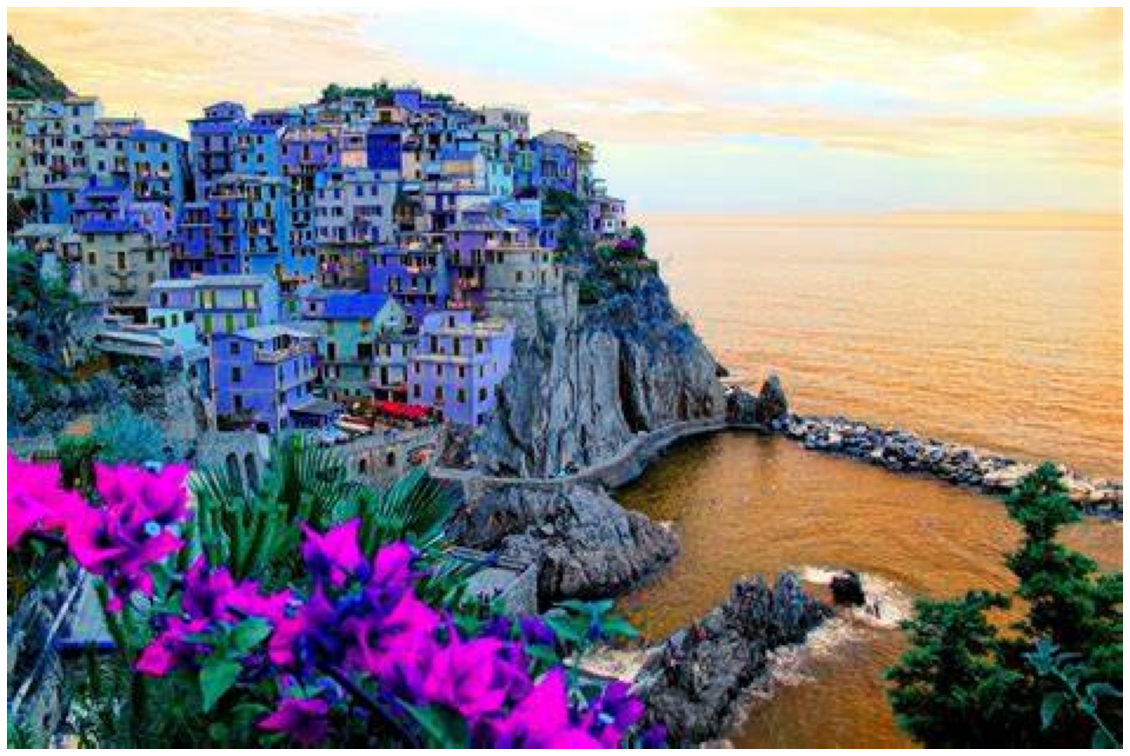

In [32]:
plt.figure(figsize= (20,14))
plt.imshow(img)
plt.axis('off')

### a)

In [33]:
x,y,c = img.shape
print("The size of the image is ({} x {})".format(x,y))
print("The number of channels of the image are {}".format(c))

The size of the image is (315 x 474)
The number of channels of the image are 3


### b)

(-0.5, 49.5, 49.5, -0.5)

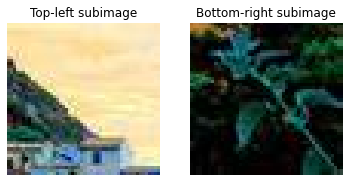

In [34]:
# Extracting sub-images
subimg1 = img[:50, :50, ]
subimg2 = img[-50:,-50:, ]
fig, ax = plt.subplots(1,2)
ax[0].imshow(subimg1)
ax[0].set_title('Top-left subimage')
ax[0].axis('off')
ax[1].imshow(subimg2)
ax[1].set_title('Bottom-right subimage')
ax[1].axis('off')

In [35]:
#grayscale for intensity
g_subimg1 = cv2.cvtColor(subimg1, cv2.COLOR_BGR2GRAY)
g_subimg2 = cv2.cvtColor(subimg2, cv2.COLOR_BGR2GRAY)

SSD =  ((g_subimg1.astype(int)-g_subimg2.astype(int))**2).sum()
print('SSD of the intensities =', SSD)

SSD of the intensities = 62657575


### Question 2

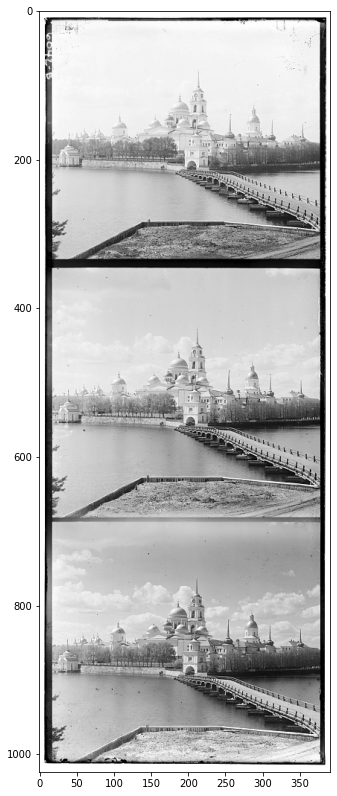

In [65]:
img = cv2.imread('monastery.jpg',0) 
plt.figure(figsize= (20,14))
plt.imshow(img,cmap='gray')

In [66]:
# Splitting the image vertically
blue, green, red = np.array_split(img, indices_or_sections=3, axis=0)

In [67]:
print('Dimensions of the individual channels are: \n Red:{}\n Blue:{}\n Green:{}'.format(red.shape, blue.shape, green.shape))

Dimensions of the individual channels are: 
 Red:(341, 391)
 Blue:(342, 391)
 Green:(341, 391)


In [68]:
fixed = blue

In [69]:
# Set the search window
window = [-10, 10]

In [70]:
# Fixing the resolution of final image as that of the blue channel
resolution = blue.shape

In [71]:
def padding(img, res):
  delta_vertical = res[0] - img.shape[0]
  pad_top = delta_vertical//2
  pad_bottom = delta_vertical - pad_top
  delta_horizontal = res[1] - img.shape[1]
  pad_left = delta_horizontal//2
  pad_right = delta_horizontal - pad_left
  return cv2.copyMakeBorder(img, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=0)

In [72]:
# Making all channels of the same resolution
green = padding(green, resolution)
red = padding(red, resolution)

In [73]:
# Function for sliding picture by (dx, dy)
def slide(img, dy, dx):
  # y-axis roll
  new_img = np.roll(img, dy, axis=0)
  if dy>0:
    new_img[0:dy,:]=0
  elif dy<0:
    new_img[dy:,:]=0
  # x-axis roll
  new_img = np.roll(new_img, dx, axis=1)
  if dx>0:
    new_img[:, 0:dx]=0
  elif dx<0:
    new_img[:, dx:]=0

  return new_img

In [75]:
# Slide the green channel over the bottom channel
best_ssd_g = float("inf")
for dx in range(window[0], window[1]+1):
    for dy in range(window[0], window[1]+1):
        # Compute the SSD
        top = slide(green,dx,dy)

        cropped_top = top[10:top.shape[0]-10, 10:top.shape[1]-10]
        cropped_bottom = fixed[10:fixed.shape[0]-10, 10:fixed.shape[1]-10]

        ssd = ((cropped_top.astype(int) - cropped_bottom.astype(int)) ** 2).sum()
        # Update the best SSD and displacement vector
        if ssd <= best_ssd_g:
            green_aligned = top
            best_ssd_g = ssd
            dx_g, dy_g = dx, dy

In [76]:
# Print the best SSD values and displacement vectors for green channel
print("Best SSD for green channel:", best_ssd_g)
print("Displacement vector for green channel:", (dx_g, dy_g))

Best SSD for green channel: 169101693
Displacement vector for green channel: (-2, 2)


In [77]:
# Slide the red channel over the bottom channel
best_ssd_r = float("inf")
for dx in range(window[0], window[1]+1):
    for dy in range(window[0], window[1]+1):
        # Compute the SSD
        top = slide(red,dx,dy)

        cropped_top = top[10:top.shape[0]-10, 10:top.shape[1]-10]
        cropped_bottom = fixed[10:fixed.shape[0]-10, 10:fixed.shape[1]-10]

        ssd = ((cropped_top.astype(int) - cropped_bottom.astype(int)) ** 2).sum()
        # Update the best SSD and displacement vector
        if ssd <= best_ssd_r:
            red_aligned = top
            best_ssd_r = ssd
            dx_r, dy_r = dx, dy

In [78]:
# Print the best SSD values and displacement vectors for red channel
print("Best SSD for red channel:", best_ssd_r)
print("Displacement vector for red channel:", (dx_r, dy_r))

Best SSD for red channel: 392475460
Displacement vector for red channel: (4, 2)


In [80]:
col_img = cv2.merge((red_aligned, green_aligned, fixed))

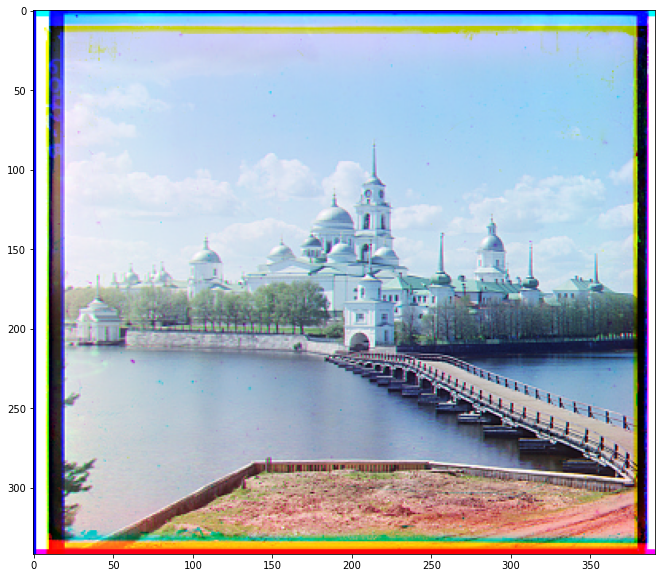

In [81]:
plt.figure(figsize= (15,10))
plt.imshow(col_img)